# <center>   Model Devloppement
   

<img src="Downloads\car-price-prediction_Model-selection.png">

### In this part of our project we will,predict the price of house using multiple machine learning models, then evaluate each model and select the best. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures


from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,\
VotingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from xgboost import XGBRegressor


from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix


from datetime import datetime

warnings.filterwarnings("ignore")

## 1-Data Preparation

In [8]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",1000)
train_df=pd.read_csv("cars_price_prediction_22_features.csv")
train_df.drop(columns=["Unnamed: 0"],inplace=True)
train_df

,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,YearRemodAdd,SalePrice,BsmtQual,BsmtCond,ExterQual,Foundation,GarageFinish,HeatingQC,KitchenQual,BsmtFinType1,Condition2,HouseStyle,Exterior1st,Age,GrLivArea_m2,GarageArea_m2,TotalBsmt_m2,1stFlr_m2
0,7,2.0,2,8,2003,208500.0,Gd,TA,Gd,PConc,RFn,Ex,Gd,GLQ,Norm,2Story,VinylSd,20,158.864130,50.910844,79.524968,79.524968
1,6,2.0,2,6,1976,181500.0,Gd,TA,TA,CBlock,RFn,Ex,TA,ALQ,Norm,1Story,MetalSd,47,117.243586,42.735380,117.243586,117.243586
2,7,2.0,2,6,2002,223500.0,Gd,TA,Gd,PConc,RFn,Ex,Gd,GLQ,Norm,2Story,VinylSd,22,165.924758,56.485024,85.470760,85.470760
3,7,3.0,1,7,1970,140000.0,TA,Gd,TA,BrkTil,Unf,Gd,Gd,ALQ,Norm,2Story,Wd Sdng,108,159.514451,59.643726,70.234668,89.279783
4,8,3.0,2,9,2000,250000.0,Gd,TA,Gd,PConc,RFn,Ex,Gd,GLQ,Norm,2Story,VinylSd,23,204.200794,77.666908,106.373935,106.373935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,7,2.0,2,6,2005,185000.0,Gd,TA,Gd,PConc,RFn,Ex,Gd,GLQ,Norm,1Story,VinylSd,19,113.434563,37.161200,113.434563,113.434563
1314,6,2.0,2,7,2000,175000.0,Gd,TA,TA,PConc,RFn,Ex,TA,Unf,Norm,2Story,VinylSd,24,153.011241,42.735380,88.536559,88.536559
1315,6,2.0,2,7,1988,210000.0,Gd,TA,TA,CBlock,Unf,TA,TA,ALQ,Norm,1Story,Plywood,45,192.587919,46.451500,143.256426,192.587919
1316,7,1.0,2,9,2006,266500.0,TA,Gd,Ex,Stone,RFn,Ex,Gd,GLQ,Norm,2Story,CemntBd,82,217.393020,23.411556,107.024256,110.368764


In [10]:
data=pd.read_csv("House_price_prediction_No_Outliers.csv")
test_df=data[data["SalePrice"].isnull()]

test_df['Age']=datetime.now().year-test_df["YearBuilt"]

test_df[['GrLivArea_m2']]=test_df[['GrLivArea']]*0.092903
test_df[["GarageArea_m2"]]=test_df[["GarageArea"]]*0.092903
test_df[["TotalBsmt_m2"]]=test_df[["TotalBsmtSF"]]*0.092903
test_df[["1stFlr_m2"]]=test_df[["1stFlrSF"]]*0.092903

In [11]:
test_df=test_df[train_df.columns]
test_df.drop(columns=["SalePrice"],inplace=True)

In [12]:
test_df

,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,YearRemodAdd,BsmtQual,BsmtCond,ExterQual,Foundation,GarageFinish,HeatingQC,KitchenQual,BsmtFinType1,Condition2,HouseStyle,Exterior1st,Age,GrLivArea_m2,GarageArea_m2,TotalBsmt_m2,1stFlr_m2
1318,5,1.0,1,5,1961,TA,TA,TA,CBlock,Unf,TA,TA,Rec,Norm,1Story,VinylSd,62,83.241088,67.819190,81.940446,83.241088
1319,6,1.0,1,6,1958,TA,TA,TA,CBlock,Unf,TA,Gd,ALQ,Norm,1Story,Wd Sdng,65,123.468087,28.985736,123.468087,123.468087
1320,5,2.0,2,6,1998,Gd,TA,TA,PConc,Fin,Gd,TA,GLQ,Norm,2Story,VinylSd,26,151.338987,44.779246,86.213984,86.213984
1321,6,2.0,2,7,1998,TA,TA,TA,PConc,Fin,Ex,Gd,GLQ,Norm,2Story,VinylSd,25,149.016412,43.664410,86.028178,86.028178
1322,8,2.0,2,5,1992,Gd,TA,Gd,PConc,RFn,Ex,Gd,ALQ,Norm,1Story,HdBoard,31,118.915840,47.008918,118.915840,118.915840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,4,0.0,1,5,1970,TA,TA,TA,CBlock,Unf,Gd,TA,Unf,Norm,2Story,CemntBd,53,101.450076,0.000000,50.725038,50.725038
2773,4,1.0,1,6,1970,TA,TA,TA,CBlock,Unf,TA,TA,Rec,Norm,2Story,CemntBd,53,101.450076,26.570258,50.725038,50.725038
2774,5,2.0,1,7,1996,TA,TA,TA,CBlock,Unf,Ex,TA,ALQ,Norm,1Story,VinylSd,63,113.713272,53.512128,113.713272,113.713272
2775,5,0.0,1,6,1992,Gd,TA,TA,PConc,Unf,TA,TA,GLQ,Norm,SFoyer,HdBoard,31,90.115910,0.000000,84.727536,90.115910


In [13]:
data=pd.concat([train_df,test_df],axis=0)
df=pd.get_dummies(data)
df["AgeRemodAdd"]=datetime.now().year-df["YearRemodAdd"]
df.drop(columns=["YearRemodAdd"],inplace=True)

In [15]:

train_df=df[~df["SalePrice"].isnull()]
test_df=df[df["SalePrice"].isnull()]
#df["AgeRemodAdd"]

In [16]:
test_df

,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,SalePrice,Age,GrLivArea_m2,GarageArea_m2,TotalBsmt_m2,1stFlr_m2,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Na,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Na,BsmtCond_Po,BsmtCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Na,BsmtFinType1_Rec,BsmtFinType1_Unf,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,AgeRemodAdd
1318,5,1.0,1,5,NaN,62,83.241088,67.819190,81.940446,83.241088,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,62
1319,6,1.0,1,6,NaN,65,123.468087,28.985736,123.468087,123.468087,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,65
1320,5,2.0,2,6,NaN,26,151.338987,44.779246,86.213984,86.213984,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,25
1321,6,2.0,2,7,NaN,25,149.016412,43.664410,86.028178,86.028178,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,25
1322,8,2.0,2,5,NaN,31,118.915840,47.008918,118.915840,118.915840,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,4,0.0,1,5,NaN,53,101.450076,0.000000,50.725038,50.725038,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,53
2773,4,1.0,1,6,NaN,53,101.450076,26.570258,50.725038,50.725038,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,53
2774,5,2.0,1,7,NaN,63,113.713272,53.512128,113.713272,113.713272,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,27
2775,5,0.0,1,6,NaN,31,90.115910,0.000000,84.727536,90.115910,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,31


In [17]:
# define predictor(X) and target(Y)
X=train_df.drop(columns="SalePrice")
Y=train_df["SalePrice"]

In [18]:
# define train and test data 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
print(x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape)

(922, 79) (922,) (396, 79) (396,)


In [19]:
model_=[]
score=[]
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions[0:5]))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mse(y_test,predictions)))
    print('MSE:{}'.format(mse(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mse(y_test,predictions))))
    model_.append(type(ml_model).__name__)
    score.append(np.round(r2score,2))
    
     
    sns.distplot(y_test-predictions)      
          

## LinearRegression :

Model is: LinearRegression()
Training score: 0.8805983211375376
Predictions are: [120570.98995733 100777.73102485 253501.51012345 191686.97350888
  38327.34591528]


r2 score is: 0.8713966154831407
MAE:651860118.0717856
MSE:651860118.0717856
RMSE:25531.55142312714


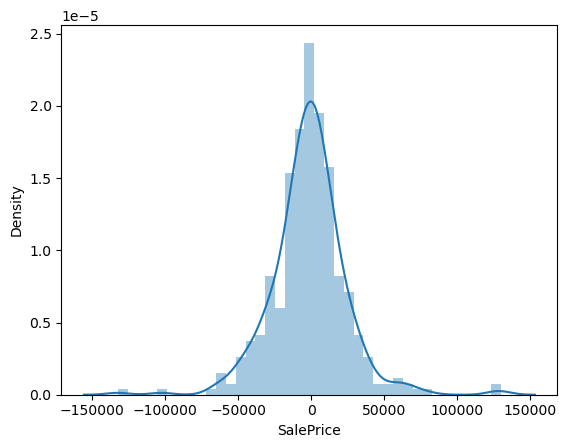

In [34]:
predict(LinearRegression())

## Ridge :

Model is: Ridge()
Training score: 0.880186754238988
Predictions are: [120232.88413778 100613.93052919 253564.39525255 191813.54621221
  38366.14896712]


r2 score is: 0.8713518275627131
MAE:652087137.4399602
MSE:652087137.4399602
RMSE:25535.99689536244


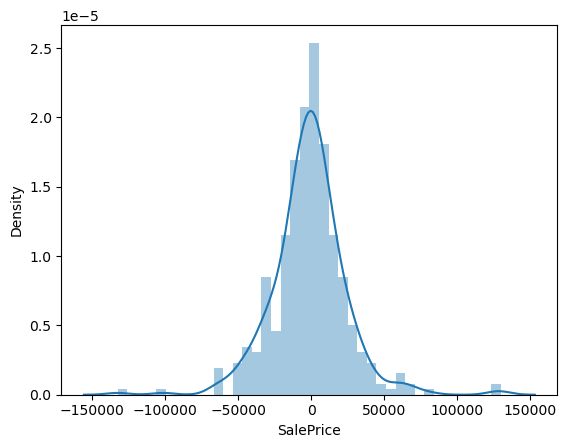

In [76]:
predict(Ridge())

## Decision Tree Regressor

Model is: DecisionTreeRegressor()
Training score: 0.9999124948747394
Predictions are: [125000.  93500. 260000. 202665.  68400.]


r2 score is: 0.7519202269393237
MAE:1257457653.7474747
MSE:1257457653.7474747
RMSE:35460.64937007605


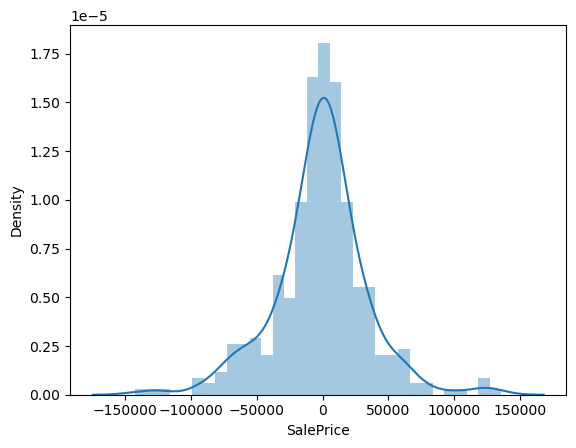

In [77]:
predict(DecisionTreeRegressor())

Model is: RandomForestRegressor()
Training score: 0.9801490626121787
Predictions are: [117440.58 118498.08 248214.02 197362.42  78492.  ]


r2 score is: 0.8653267989508318
MAE:682626581.4606733
MSE:682626581.4606733
RMSE:26127.123482325285


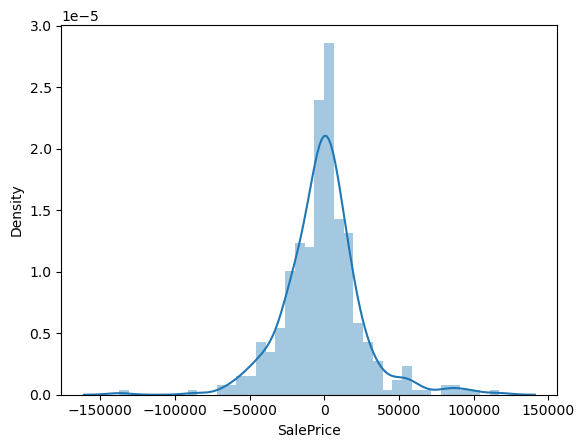

In [78]:
predict(RandomForestRegressor())

## K Neighbors Regressor

Model is: KNeighborsRegressor()
Training score: 0.8677008935053283
Predictions are: [128680.  114801.6 277180.  198543.   76800. ]


r2 score is: 0.8245877492010276
MAE:889123182.4623233
MSE:889123182.4623233
RMSE:29818.1686637916


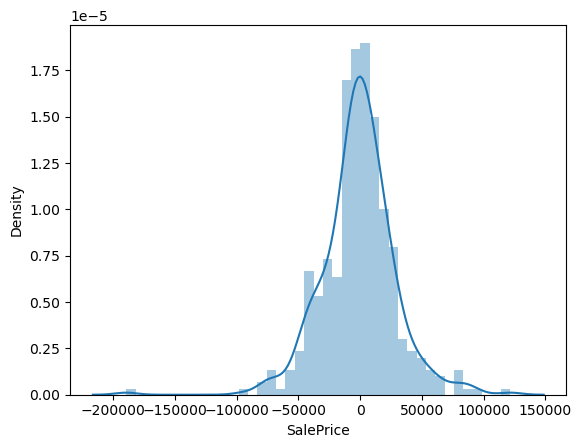

In [79]:
predict(KNeighborsRegressor())

## SVC 

Model is: SVC()
Training score: 0.01735357917570499
Predictions are: [140000. 140000. 140000. 140000. 140000.]


r2 score is: -0.2652421034430028
MAE:6413212762.931818
MSE:6413212762.931818
RMSE:80082.5371908996


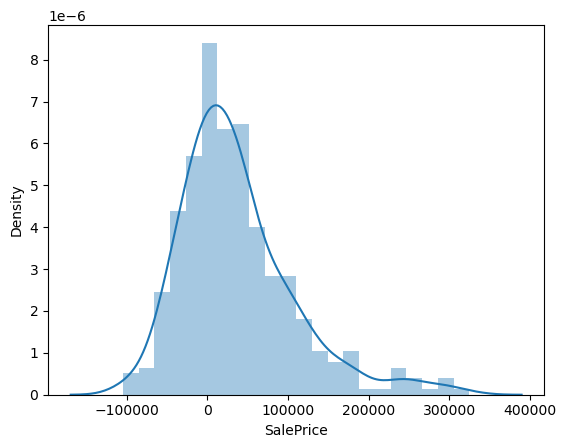

In [40]:
predict(svm.SVC())

## Gradient Boosting Regressor:

Model is: GradientBoostingRegressor()
Training score: 0.9433632208835067
Predictions are: [124779.04141749 117849.72741892 230538.80184022 190914.57711914
  66169.4864102 ]


r2 score is: 0.8817142289253401
MAE:599562577.5216808
MSE:599562577.5216808
RMSE:24485.966950922742


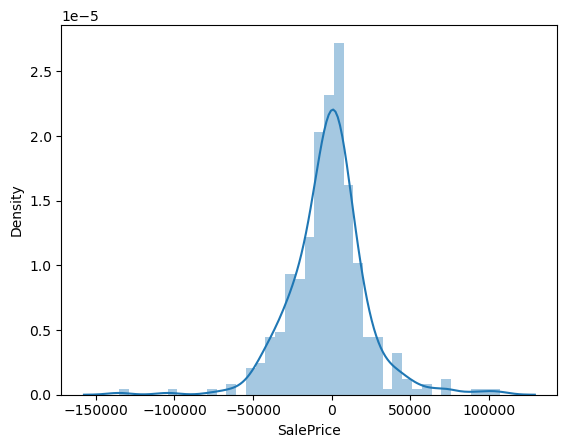

In [80]:
predict(GradientBoostingRegressor())

## MLP Regressor:

Model is: MLPRegressor()
Training score: -2.993491797143514
Predictions are: [46156.1144082  51411.39563701 69662.01270632 57314.27629029
 47656.76282409]


r2 score is: -2.559140497435794
MAE:18040440798.728912
MSE:18040440798.728912
RMSE:134314.70805064094


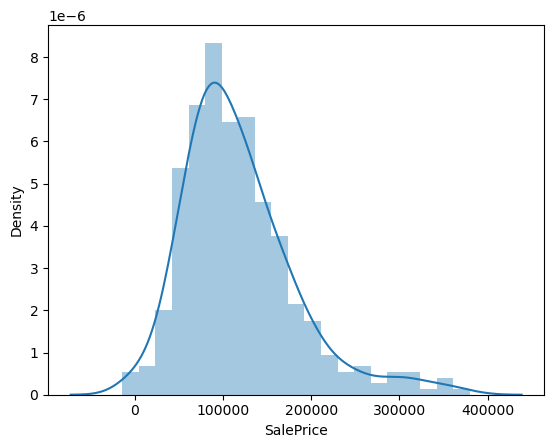

In [81]:
predict(MLPRegressor())

## Logistic Regression:

Model is: LogisticRegression()
Training score: 0.07266811279826464
Predictions are: [125000. 135000. 236500. 174000.  79000.]


r2 score is: 0.6842829618046209
MAE:1600294942.2247474
MSE:1600294942.2247474
RMSE:40003.68660792087


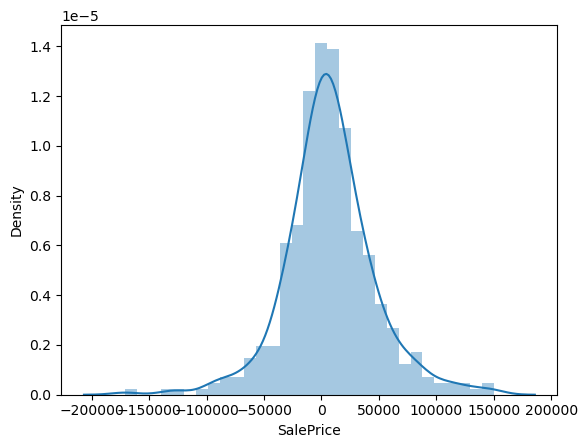

In [13]:
predict(LogisticRegression())

## Ada Boost Regressor:

Model is: AdaBoostRegressor()
Training score: 0.8583740952226939
Predictions are: [115891.99141631 113281.91803279 242724.23446328 190960.18644068
 105669.46363636]


r2 score is: 0.8157265273403684
MAE:934038618.78657
MSE:934038618.78657
RMSE:30562.04539599027


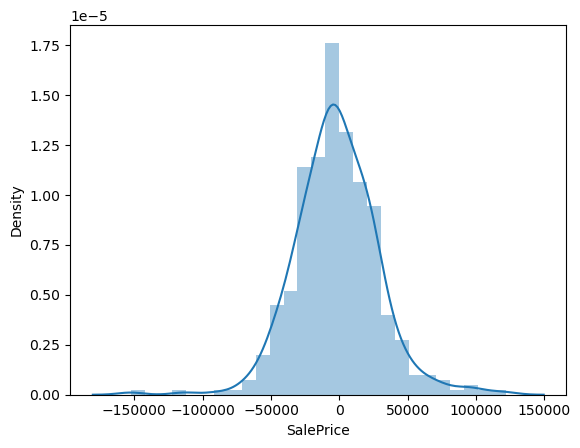

In [14]:
predict(AdaBoostRegressor())

## Extra Trees Regressor:

Model is: ExtraTreesRegressor()
Training score: 0.9999124948747394
Predictions are: [116890.83 117549.33 233941.75 202665.    82598.75]


r2 score is: 0.8492221166147333
MAE:764257404.5417055
MSE:764257404.5417055
RMSE:27645.205814782887


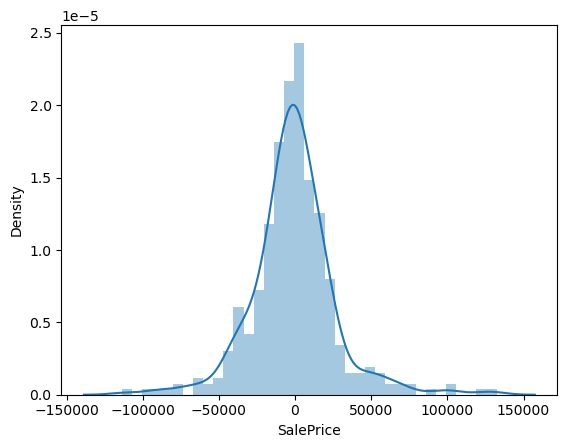

In [15]:
predict(ExtraTreesRegressor())

## Hist Gradient Boosting Regressor:

Model is: HistGradientBoostingRegressor()
Training score: 0.9789218515159277
Predictions are: [125240.01661069 118420.36163122 236648.17255346 198849.51584854
  68224.11828742]


r2 score is: 0.871496018175778
MAE:651356269.3495868
MSE:651356269.3495868
RMSE:25521.6823377611


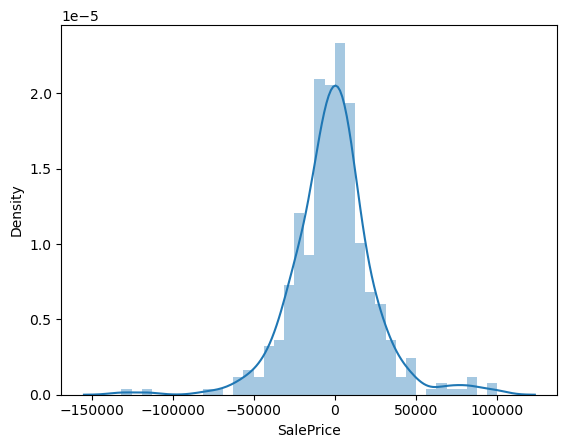

In [16]:
predict(HistGradientBoostingRegressor())

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)
Training score: 0.9994661549940351
Predictions are: [123201.72 122240.88 230885.7  201005.25  68604.36]


r2 score is: 0.8537921969768535
MAE:741092748.8396727
MSE:741092748.8396727
RMSE:27223.018731207467


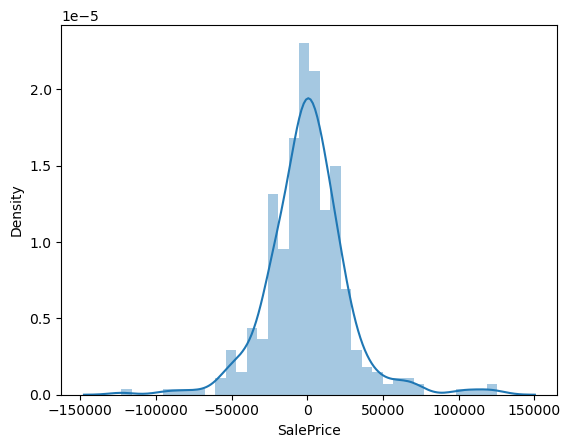

In [22]:
predict(XGBRegressor( random_state=123))

In [17]:
model_score=pd.DataFrame()
model_score["Model"]=model_
model_score["Score"]=score
Top5Scors=model_score.sort_values(by="Score",ascending=False).head(5)
print("The best 5 models are:")
Top5Scors

The best 5 models are:


,Model,Score
0,GradientBoostingRegressor,0.88
4,HistGradientBoostingRegressor,0.87
3,ExtraTreesRegressor,0.85
2,AdaBoostRegressor,0.82
1,LogisticRegression,0.68


# Hypertuning Models

## Gradient Boosting Regressor:

In [20]:
GBR=GradientBoostingRegressor()

In [24]:
# Parameters:
para={"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
     "learning_rate":[0,0.2,0.5,0.8,1],
      #"n_estimators":[100,200,300,400]
     "criterion" : ['friedman_mse', 'squared_error'],
      "max_features" : ['auto', 'sqrt', 'log2']
     }

In [25]:
gs_3cv=GridSearchCV(GBR,param_grid=para,cv=3)

Model is: GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9445082948392886
Predictions are: [124547.69563786 117794.1516724  224416.91290564 191597.74227188
  58846.08453675]


r2 score is: 0.8736868524462451
MAE:640251448.9625688
MSE:640251448.9625688
RMSE:25303.190489789402


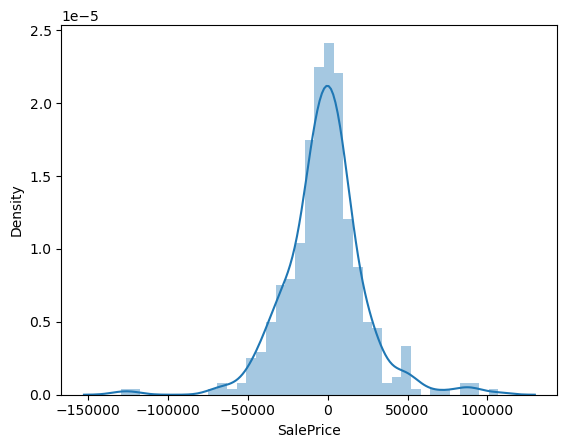

In [26]:
predict(gs_3cv)

In [27]:
gs_3cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'sqrt'}

In [29]:
gs_4cv=GridSearchCV(GBR,param_grid=para,cv=4)

Model is: GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9426621067168686
Predictions are: [122294.54288668 113789.61471151 244304.76909268 187669.08435655
  66063.90657248]


r2 score is: 0.8757951703771057
MAE:629564884.3709228
MSE:629564884.3709228
RMSE:25091.131588091495


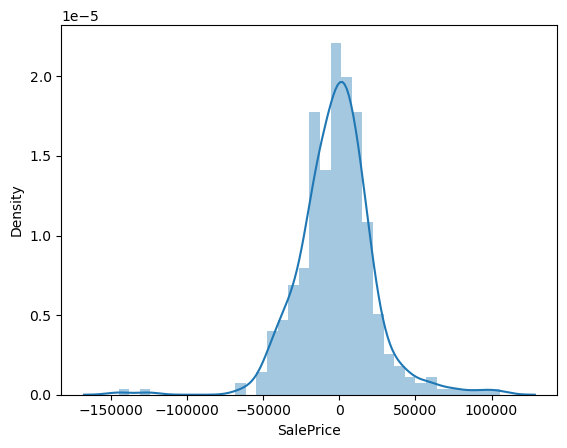

In [30]:
predict(gs_4cv)

In [55]:
gs_4cv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_features': 'auto'}

## Linear Regression

In [31]:
lr=LinearRegression()
para={"n_jobs":[-1],
     "positive":[True,False]}
gs_lr=GridSearchCV(lr,param_grid=para,cv=3)

Model is: GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 0, 1, 10, 100],
                         'positive': [True, False]})
Training score: 0.8805983211375376
Predictions are: [120570.98995733 100777.73102485 253501.51012345 191686.97350888
  38327.34591528]


r2 score is: 0.8713966154831407
MAE:651860118.0717856
MSE:651860118.0717856
RMSE:25531.55142312714


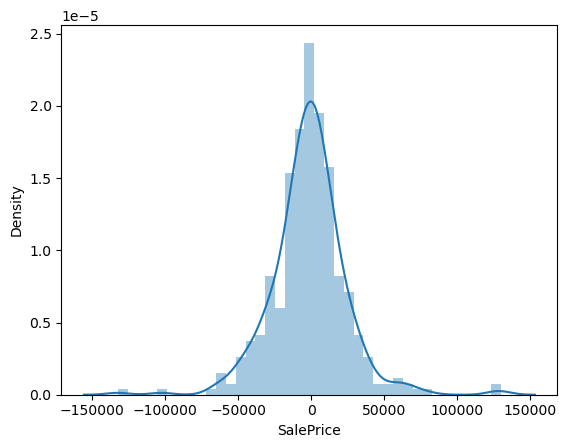

In [32]:
predict(gs_lr)

In [33]:
gs_lr.best_params_

{'n_jobs': None, 'positive': False}

## Ridge 

In [34]:
rr=Ridge()
param={"alpha":[10,1,0.1,0.001,0.0001],
      "solver":['auto', 'svd', 'cholesky','lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
     "random_state":range(1,100,10),
      "tol":[0.001,0.0001,0.00001]}
sg_rr=GridSearchCV(rr,param_grid=param,cv=3)

Model is: GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [10, 1, 0.1, 0.001, 0.0001],
                         'random_state': range(1, 100, 10),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.001, 0.0001, 1e-05]})
Training score: 0.8752217929188678
Predictions are: [114788.12824674  99854.87714131 253498.35688676 192175.34192317
  38955.48513358]


r2 score is: 0.8707801700028942
MAE:654984734.3099036
MSE:654984734.3099036
RMSE:25592.66954246672


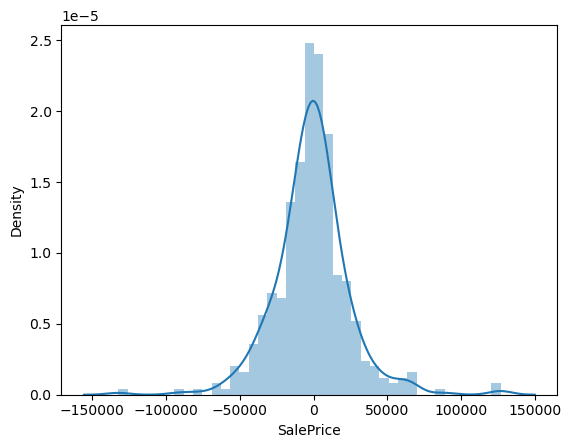

In [35]:
predict(sg_rr)

In [36]:
sg_rr.best_params_

{'alpha': 1, 'random_state': 71, 'solver': 'sag', 'tol': 0.0001}

## 	Hist Gradient Boosting Regressor	

In [37]:
hgbr=HistGradientBoostingRegressor()
param={"learning_rate":[0,0.2,0.5,0.8,1],
       "loss":['squared_error', 'absolute_error', 'poisson', 'quantile'],
      "l2_regularization":[0,0.1,0.5,1,5,10]}
sg_hgbr=GridSearchCV(hgbr,param_grid=param,cv=4)

Model is: GridSearchCV(cv=4, estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5, 1, 5, 10],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'poisson',
                                  'quantile']})
Training score: 0.9470468557619236
Predictions are: [129252.51929933 119181.60486257 219617.7121518  194352.51385698
  72631.72690488]


r2 score is: 0.8731617987309499
MAE:642912821.9748905
MSE:642912821.9748905
RMSE:25355.725625090883


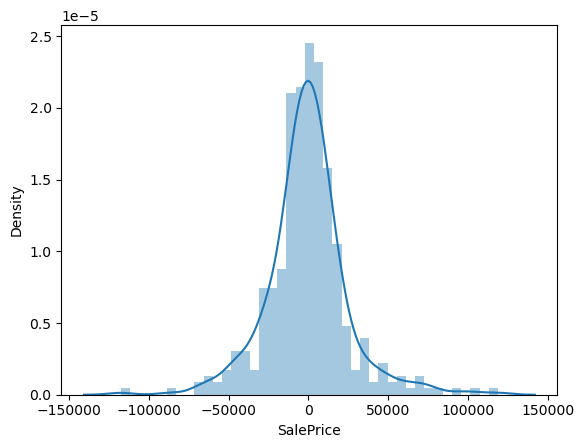

In [38]:
predict(sg_hgbr)

In [88]:
sg_hgbr.best_params_

{'l2_regularization': 1, 'learning_rate': 0.2, 'loss': 'absolute_error'}

## Lasso Regressor

In [48]:
l=Lasso()
param={"alpha":[0.001,0.01,0.1,1,10],
 "selection" : ['cyclic', 'random']}
sg_l=GridSearchCV(l,param_grid=param,cv=5)

Model is: GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'selection': ['cyclic', 'random']})
Training score: 0.8805929768985872
Predictions are: [120422.44618259 100742.50602289 253592.57657835 191748.2470234
  38682.53320889]


r2 score is: 0.8710744477039951
MAE:653493110.2931159
MSE:653493110.2931159
RMSE:25563.511306022025


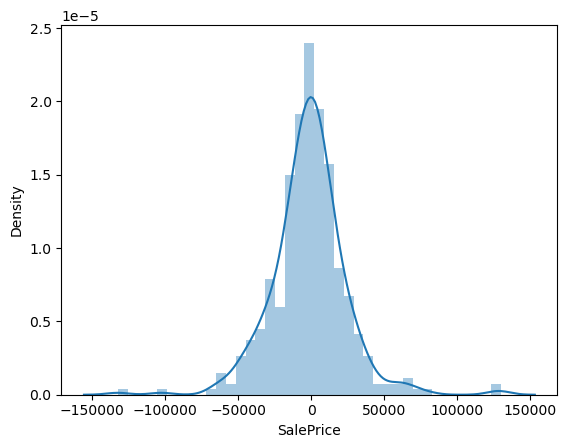

In [49]:
predict(sg_l)

In [46]:
sg_l.best_params_

{'alpha': 10, 'selection': 'cyclic'}

## Polynomial Features-Ridge

In [52]:
from sklearn.pipeline import make_pipeline


# Create a pipeline with Polynomial Features and Ridge regression
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(), Lasso(alpha=10,selection='cyclic'))

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': range(1,6),
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

In [53]:
# Evaluate the performance of the best model
#mse_ = mse(y_test, y_pred)
#rmse = np.sqrt(mse_)
print("Best hyperparameters:", best_params)
#print("RMSE:", rmse)

Best hyperparameters: {'polynomialfeatures__degree': 1}


In [54]:
r2_score(y_test, y_pred)

0.8710861136407259

In [ ]:
model_score=pd.DataFrame()
model_score["Model"]=model_
model_score["Score"]=score
Top5Scors=model_score.sort_values(by="Score",ascending=False)
print("The best 5 models are:")
Top5Scors

### lets strandardize our data and see the results :

In [40]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [41]:
models=[gs_3cv,gs_lr,sg_rr,sg_hgbr]

Model is: GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9341674128377749
Predictions are: [122722.19878194 124012.54279446 236771.58751123 188293.73186742
  55452.84602743]


r2 score is: 0.8717412128173209
MAE:650113435.7446464
MSE:650113435.7446464
RMSE:25497.322128895154
Model is: GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 0, 1, 10, 100],
                         'positive': [True, False]})
Training score: 0.8747420732548989
Predictions are: [114916.5 106468.5 254820.5 194148.5  39140.5]


r2 score is: -9.290539526131538e+24
MAE:4.709154595896943e+34
MSE:4.709154595896943e+34
RMSE:

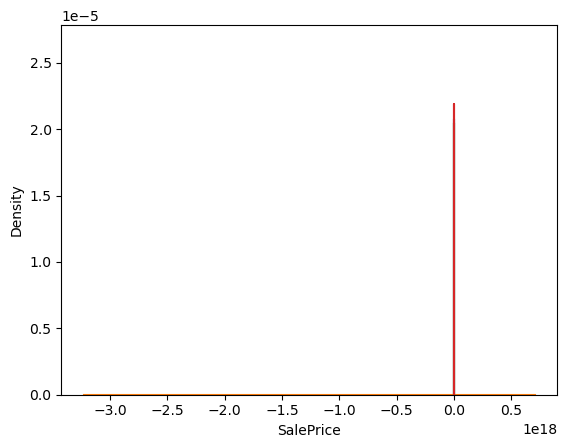

In [42]:
for mdl in models:
    predict(mdl)
    

____
____


### The best score we can get is 0.882 from Gradient Boost Regressor with the default parametres.
        

# Predictions

In [89]:
test_df.drop(columns=["SalePrice"],inplace=True)

In [99]:
test_df.index=range(1461,2920)
test_df

,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,Age,GrLivArea_m2,GarageArea_m2,TotalBsmt_m2,1stFlr_m2,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Na,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Na,BsmtCond_Po,BsmtCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Na,BsmtFinType1_Rec,BsmtFinType1_Unf,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,AgeRemodAdd
1461,5,1.0,1,5,62,83.241088,67.819190,81.940446,83.241088,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,62
1462,6,1.0,1,6,65,123.468087,28.985736,123.468087,123.468087,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,65
1463,5,2.0,2,6,26,151.338987,44.779246,86.213984,86.213984,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,25
1464,6,2.0,2,7,25,149.016412,43.664410,86.028178,86.028178,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,25
1465,8,2.0,2,5,31,118.915840,47.008918,118.915840,118.915840,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,4,0.0,1,5,53,101.450076,0.000000,50.725038,50.725038,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,53
2916,4,1.0,1,6,53,101.450076,26.570258,50.725038,50.725038,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,53
2917,5,2.0,1,7,63,113.713272,53.512128,113.713272,113.713272,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,27
2918,5,0.0,1,6,31,90.115910,0.000000,84.727536,90.115910,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,31


In [82]:
best_model=GradientBoostingRegressor(random_state=None)
best_model.fit(x_train,y_train)
yhat=best_model.predict(x_test)
rmse=np.sqrt(mse(yhat,y_test))
r2=r2_score(y_test,yhat)
print("RMSE:",np.round(rmse,3)," and ","R2_score: ",np.round(r2,3))

RMSE: 24448.625  and  R2_score:  0.882


In [91]:
predictions=best_model.predict(test_df)
predictions

array([124287.28441012, 143437.9068818 , 185931.07545696, ...,
       154791.56980259, 123282.84782649, 225933.21884516])

In [108]:
submission=pd.DataFrame({"Id":test_df.index,"SalePrice":predictions},index= None)
submission.to_csv("Sale_Price_Prediction_Submission.csv",index=False)